DA Final project:

Group 24

The cost of living in the US

##  Name of students:
Reut Levy<br>
Meitav Abu<br>


<a id='top'></a>

<div>
<img src="https://github.com/MeitavReut/project300/raw/main/dolar.png" width="500"/>
</div>

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
url='https://raw.githubusercontent.com/MeitavReut/project300/main/%D7%99%D7%95%D7%A7%D7%A8%20%D7%94%D7%9E%D7%97%D7%99%D7%94%20%D7%90%D7%A8%D7%94%D7%91.csv'

In [3]:
us_cost_df=pd.read_csv(url)
us_cost_df.shape

(31430, 15)

In [4]:
us_cost_df.columns

Index(['case_id', 'state', 'isMetro', 'areaname', 'county',
       'family_member_count', 'housing_cost', 'food_cost',
       'transportation_cost', 'healthcare_cost', 'other_necessities_cost',
       'childcare_cost', 'taxes', 'total_cost', 'median_family_income'],
      dtype='object')

In [5]:
us_cost_df

,case_id,state,isMetro,areaname,county,family_member_count,housing_cost,food_cost,transportation_cost,healthcare_cost,other_necessities_cost,childcare_cost,taxes,total_cost,median_family_income
0,1,AL,True,"Montgomery, AL MSA",Autauga County,1p0c,8505.72876,3454.91712,10829.16876,5737.47984,4333.81344,0.0000,6392.94504,39254.0532,73010.41406
1,1,AL,True,"Montgomery, AL MSA",Autauga County,1p1c,12067.50240,5091.70788,11588.19288,8659.55640,6217.45896,6147.8298,7422.07836,57194.3256,73010.41406
2,1,AL,True,"Montgomery, AL MSA",Autauga County,1p2c,12067.50240,7460.20308,12361.77720,11581.63260,7075.65816,15824.6940,9769.56228,76141.0308,73010.41406
3,1,AL,True,"Montgomery, AL MSA",Autauga County,1p3c,15257.15040,9952.23924,13452.18600,14503.70760,9134.35620,18802.1892,13101.70320,94203.5328,73010.41406
4,1,AL,True,"Montgomery, AL MSA",Autauga County,1p4c,15257.15040,12182.21400,13744.59840,17425.78560,9942.36396,18802.1892,13469.21880,100823.5200,73010.41406
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31425,3171,WY,False,"Weston County, WY",Weston County,2p0c,8316.00000,6010.65672,14790.36240,14466.55920,5191.11288,0.0000,6640.77324,55415.4672,80177.65625
31426,3171,WY,False,"Weston County, WY",Weston County,2p1c,10956.00000,7480.86696,15611.58600,18086.24160,6680.40384,8675.8770,7933.21068,75424.1832,80177.65625
31427,3171,WY,False,"Weston County, WY",Weston County,2p2c,10956.00000,9474.35748,16163.90280,21705.92280,7402.72416,21207.6984,9502.56228,96413.1684,80177.65625
31428,3171,WY,False,"Weston County, WY",Weston County,2p3c,13632.00000,11567.46972,17118.38400,25325.60400,9130.76148,25063.6440,11456.36724,113294.2260,80177.65625


### 1.data

In [6]:
us_cost_df.isnull().sum()

case_id                    0
state                      0
isMetro                    0
areaname                   0
county                     0
family_member_count        0
housing_cost               0
food_cost                  0
transportation_cost        0
healthcare_cost            0
other_necessities_cost     0
childcare_cost             0
taxes                      0
total_cost                 0
median_family_income      10
dtype: int64

In [7]:
us_cost_df.dtypes

case_id                     int64
state                      object
isMetro                      bool
areaname                   object
county                     object
family_member_count        object
housing_cost              float64
food_cost                 float64
transportation_cost       float64
healthcare_cost           float64
other_necessities_cost    float64
childcare_cost            float64
taxes                     float64
total_cost                float64
median_family_income      float64
dtype: object

**we split the family_member_count columns into a parent column and a child column**

In [8]:
us_cost_df['adults'] = us_cost_df['family_member_count'].str.extract(r'(\d+)p')[0].astype(int)
us_cost_df['children'] = us_cost_df['family_member_count'].str.extract(r'p(\d+)c')[0].astype(int)
us_cost_df

,case_id,state,isMetro,areaname,county,family_member_count,housing_cost,food_cost,transportation_cost,healthcare_cost,other_necessities_cost,childcare_cost,taxes,total_cost,median_family_income,adults,children
0,1,AL,True,"Montgomery, AL MSA",Autauga County,1p0c,8505.72876,3454.91712,10829.16876,5737.47984,4333.81344,0.0000,6392.94504,39254.0532,73010.41406,1,0
1,1,AL,True,"Montgomery, AL MSA",Autauga County,1p1c,12067.50240,5091.70788,11588.19288,8659.55640,6217.45896,6147.8298,7422.07836,57194.3256,73010.41406,1,1
2,1,AL,True,"Montgomery, AL MSA",Autauga County,1p2c,12067.50240,7460.20308,12361.77720,11581.63260,7075.65816,15824.6940,9769.56228,76141.0308,73010.41406,1,2
3,1,AL,True,"Montgomery, AL MSA",Autauga County,1p3c,15257.15040,9952.23924,13452.18600,14503.70760,9134.35620,18802.1892,13101.70320,94203.5328,73010.41406,1,3
4,1,AL,True,"Montgomery, AL MSA",Autauga County,1p4c,15257.15040,12182.21400,13744.59840,17425.78560,9942.36396,18802.1892,13469.21880,100823.5200,73010.41406,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31425,3171,WY,False,"Weston County, WY",Weston County,2p0c,8316.00000,6010.65672,14790.36240,14466.55920,5191.11288,0.0000,6640.77324,55415.4672,80177.65625,2,0
31426,3171,WY,False,"Weston County, WY",Weston County,2p1c,10956.00000,7480.86696,15611.58600,18086.24160,6680.40384,8675.8770,7933.21068,75424.1832,80177.65625,2,1
31427,3171,WY,False,"Weston County, WY",Weston County,2p2c,10956.00000,9474.35748,16163.90280,21705.92280,7402.72416,21207.6984,9502.56228,96413.1684,80177.65625,2,2
31428,3171,WY,False,"Weston County, WY",Weston County,2p3c,13632.00000,11567.46972,17118.38400,25325.60400,9130.76148,25063.6440,11456.36724,113294.2260,80177.65625,2,3


### [](#Top)
---

# Conclusion 1


### Comparison between an area with and without Mero

In [81]:
num_counties = us_cost_df['county'].nunique()
print("Number of counties:", num_counties)

Number of counties: 1877


In [75]:
counts_per_county = us_cost_df.groupby('county')['isMetro'].any().value_counts()
print("Number of counties with Metro:",counts_per_county[True])
print("Number of counties without Metro:",counts_per_county[False])

Number of counties with Metro: 857
Number of counties without Metro: 1020



More countys with metro than without metro ,so we will work with an average.

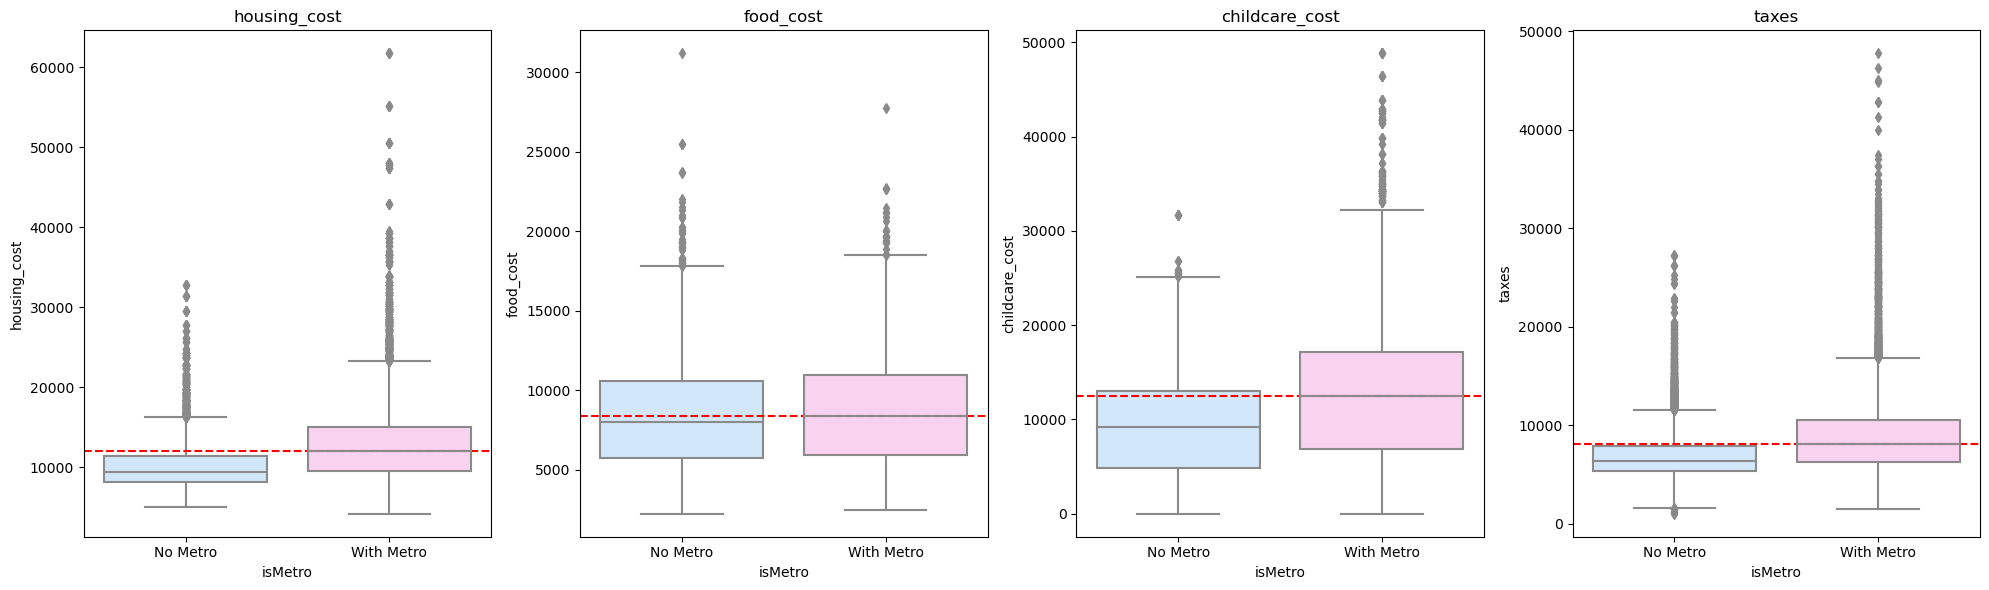

In [55]:
fig, axes = plt.subplots(1, 4, figsize=(20, 6))
cost_columns = ['housing_cost', 'food_cost', 'childcare_cost', 'taxes']
colors = ['#cce7ff', '#ffccf2']
for i, column in enumerate(cost_columns):
    sns.boxplot(
        x='isMetro',
        y=column,
        data=us_cost_df,
        ax=axes[i],
        palette=colors
    )
    axes[i].set_title(column)
    median_with_metro = us_cost_df[us_cost_df['isMetro'] == 1][column].median()
    axes[i].axhline(y=median_with_metro, color='red', linestyle='--')
    axes[i].set_xticklabels(['No Metro', 'With Metro'])
plt.subplots_adjust(wspace=0.3)
plt.tight_layout()
plt.show()


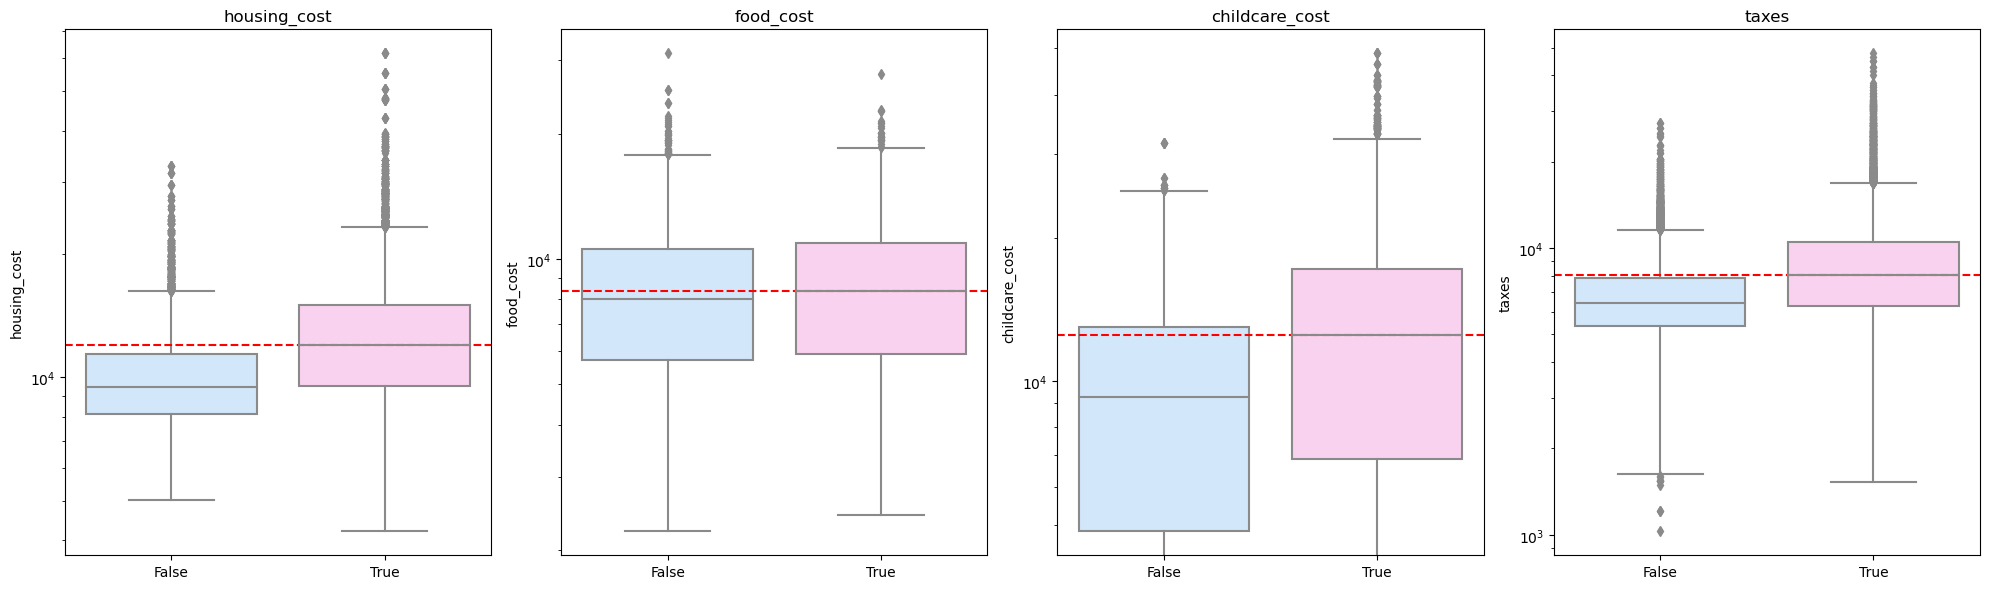

In [80]:
fig, axes = plt.subplots(1, 4, figsize=(20, 6))
cost_columns = ['housing_cost', 'food_cost', 'childcare_cost', 'taxes']
colors = ['#cce7ff', '#ffccf2']
for i, column in enumerate(cost_columns):
    sns.boxplot(
        x='isMetro',
        y=column,
        data=us_cost_df,
        ax=axes[i],
        palette=colors
    )
    axes[i].set_title(column)
    median_with_metro = us_cost_df[us_cost_df['isMetro'] == 1][column].median()
    axes[i].axhline(y=median_with_metro, color='red', linestyle='--')
    axes[i].set_yscale('log')
    axes[i].set_xlabel('')
plt.subplots_adjust(wspace=0.3)
plt.tight_layout()
plt.show()


The more central a place is, the more advanced it is, the more accessible it is to important offices, successful stores, workplaces, and the greater the accessibility of the city from and to it. From the graphs it can be seen in clearly that in all the districts where there is a metro, the average of the various expenses is higher than the average Expenses in non-metro areas.

### The average income and average expenses

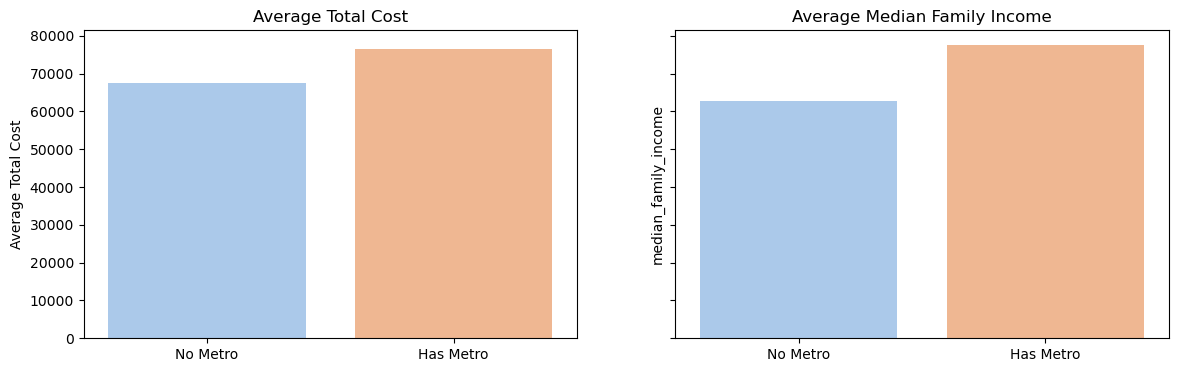

In [50]:
average_costs = us_cost_df.groupby('isMetro')[['total_cost', 'median_family_income']].mean().reset_index()
average_costs['isMetro'] = average_costs['isMetro'].map({True: 'Has Metro', False: 'No Metro'})
fig, axs = plt.subplots(1, 2, figsize=(14, 4), sharey=True)
sns.barplot(x='isMetro', y='total_cost', data=average_costs, ax=axs[0], palette='pastel')
axs[0].set_title('Average Total Cost')
axs[0].set_ylabel('Average Total Cost')
axs[0].set_xlabel('')
sns.barplot(x='isMetro', y='median_family_income', data=average_costs, ax=axs[1], palette='pastel')
axs[1].set_title('Average Median Family Income')
axs[1].set_xlabel('')
plt.show()

In areas where there is no metro you can see that the incomes and expenses are lower and therefore we will assume that it is more economical to live in these areas, we will continue to check if the information is correct.

### Savings average


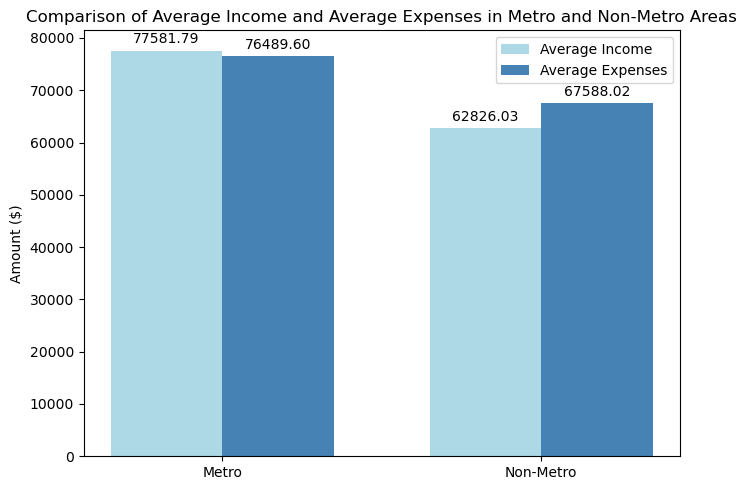

In [85]:

us_cost_df['total_people'] = us_cost_df['adults'] + us_cost_df['children']

metro_cities = us_cost_df[us_cost_df['isMetro'] == True]
non_metro_cities = us_cost_df[us_cost_df['isMetro'] == False]

average_income_metro = metro_cities['median_family_income'].mean()
average_expenses_metro = metro_cities['total_cost'].mean()

average_income_non_metro = non_metro_cities['median_family_income'].mean()
average_expenses_non_metro = non_metro_cities['total_cost'].mean()

summary_df = pd.DataFrame({
    'Area': ['Metro', 'Non-Metro'],
    'Average Income': [average_income_metro, average_income_non_metro],
    'Average Expenses': [average_expenses_metro, average_expenses_non_metro]
})

fig, ax = plt.subplots(figsize=(7, 5))

bar_width = 0.35
index = range(len(summary_df))

bar1 = plt.bar(index, summary_df['Average Income'], bar_width, label='Average Income', color='#ADD8E6')  # Light Blue
bar2 = plt.bar([i + bar_width for i in index], summary_df['Average Expenses'], bar_width, label='Average Expenses', color='#4682B4')  # Steel Blue

plt.xlabel('')
plt.ylabel('Amount ($)')
plt.title('Comparison of Average Income and Average Expenses in Metro and Non-Metro Areas')
plt.xticks([i + bar_width / 2 for i in index], summary_df['Area'])
plt.legend()

for bar in bar1:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}', 
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3), 
                textcoords='offset points',
                ha='center', va='bottom')

for bar in bar2:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}', 
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3), 
                textcoords='offset points',
                ha='center', va='bottom')

plt.tight_layout()
plt.show()


In [12]:
metro_cities = us_cost_df[us_cost_df['isMetro'] == True]

average_income_metro = metro_cities['median_family_income'].mean()

average_expenses_metro = metro_cities['total_cost'].mean()

average_income_minus_expenses_metro = average_income_metro - average_expenses_metro

print(f"Average income in metro areas: {average_income_minus_expenses_metro:.2f}")

metro_cities = us_cost_df[us_cost_df['isMetro'] == False]

average_income_metro = metro_cities['median_family_income'].mean()

average_expenses_metro = metro_cities['total_cost'].mean()

average_income_minus_expenses_metro = average_income_metro - average_expenses_metro

print(f"Average income in metro areas: {average_income_minus_expenses_metro:.2f}")


Average income in metro areas: 1092.19
Average income in metro areas: -4761.99


Contrary to the claim we believed, when we looked for which areas save more, we were surprised to find that in areas with a metro, where we found the cost of living to be high, people manage to save. On the other hand, we found that in areas without a metro, where it's cheaper, you don't save at all, and even enter a deficit. Hence it is more profitable to live in areas with a metro.

# Conclusion 2


### Average median_family_income by country

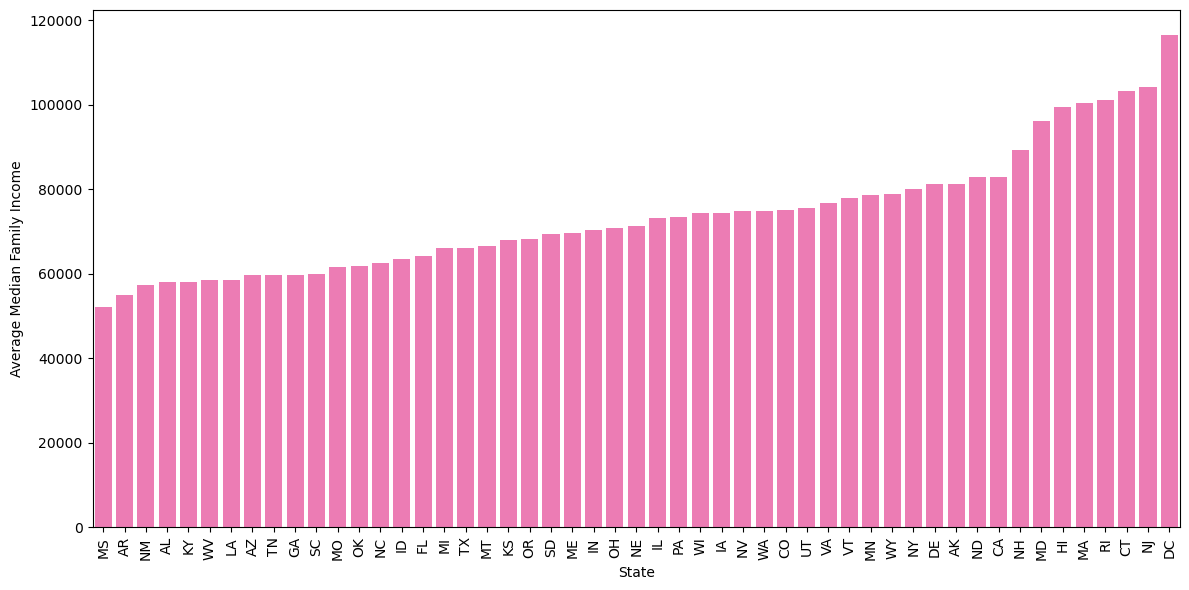

In [93]:
average_income = us_cost_df.groupby('state')['median_family_income'].mean().sort_values().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(x='state', y='median_family_income', data=average_income, color='#ff69b4')
plt.xlabel('State')
plt.ylabel('Average Median Family Income')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


The graph shows the distribution of income in the US states, we will compare between states with a large gap in income. Since there is a difference in the amount of shows for each state, we will compare between states with several neighboring counties in order to get reliable data.

In [95]:
state_counts = us_cost_df.groupby('state').size().reset_index(name='row_count')
state_counts_sorted = state_counts.sort_values(by='row_count', ascending=False)
def highlight_states(s):
    color = 'yellow' if s['state'] in ['LA', 'NY'] else ''
    return ['background-color: {}'.format(color) if v == s['state'] else '' for v in s]
state_counts_sorted.style.apply(highlight_states, axis=1)

,state,row_count
43,TX,2540
10,GA,1590
45,VA,1330
17,KY,1200
24,MO,1160
16,KS,1050
14,IL,1020
27,NC,1000
12,IA,990
42,TN,950


In [96]:
average_income_by_state = us_cost_df.groupby('state')['median_family_income'].mean().reset_index()
la_income = average_income_by_state[average_income_by_state['state'] == 'LA']['median_family_income'].values[0]
ny_income = average_income_by_state[average_income_by_state['state'] == 'NY']['median_family_income'].values[0]
print(f"The median family income for LA is: {la_income}")
print(f"The median family income for NY is: {ny_income}")


The median family income for LA is: 58620.87313937499
The median family income for NY is: 80175.4883466129


### Expenses Ratios to median_family_income for LA and NY

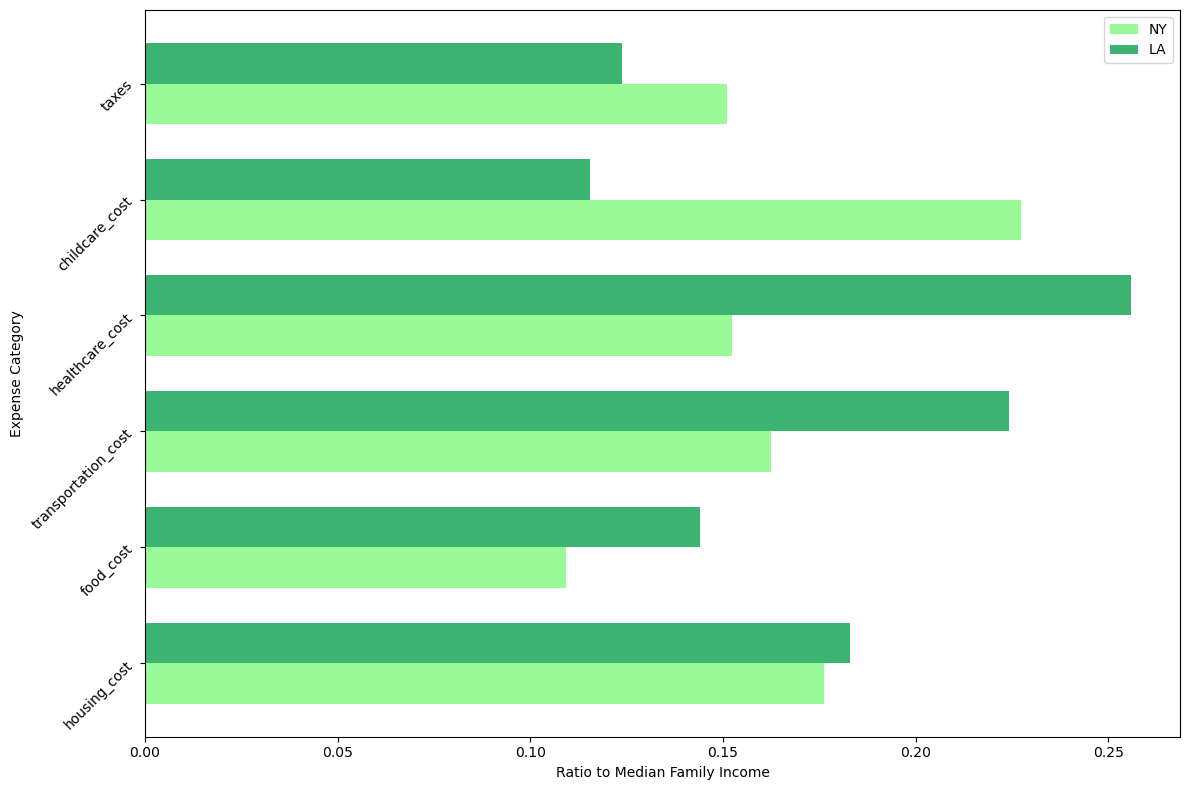

In [92]:
df_ny = us_cost_df[us_cost_df['state'] == 'NY']
df_la = us_cost_df[us_cost_df['state'] == 'LA']
median_income_ny_mean = df_ny['median_family_income'].mean()
median_income_la_mean = df_la['median_family_income'].mean()
expenses_cols = ['housing_cost', 'food_cost', 'transportation_cost', 'healthcare_cost', 'childcare_cost', 'taxes']
expenses_ny_means = df_ny[expenses_cols].mean()
expenses_la_means = df_la[expenses_cols].mean()
plt.figure(figsize=(12, 8))
bar_width = 0.35
index = range(len(expenses_cols))
plt.barh(index, expenses_ny_means / median_income_ny_mean, bar_width, label='NY', color='#98FB98')
plt.barh([i + bar_width for i in index], expenses_la_means / median_income_la_mean, bar_width, label='LA', color='#3CB371')
plt.ylabel('Expense Category')
plt.xlabel('Ratio to Median Family Income')
plt.yticks([i + bar_width / 2 for i in index], expenses_cols, rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()


We expected to see that in the expensive country we will see overwhelmingly that its expenses of all kinds will be greater. But according to the graph you can see that New York, the "expensive" state, spends less on health compared to Los Angeles, the "cheap" state. In the USA there is no mandatory health insurance, most insurances are done privately, therefore medical services in the USA are very expensive. Our assumption is that precisely for countries with a higher income we will see more spending for the health sector, but based on this graph you can see that this is not the case. We will examine this phenomenon for all states in the US and see if there is a relationship between spending on health between the different states

### Average median_family_income and Healthcare Costs per State

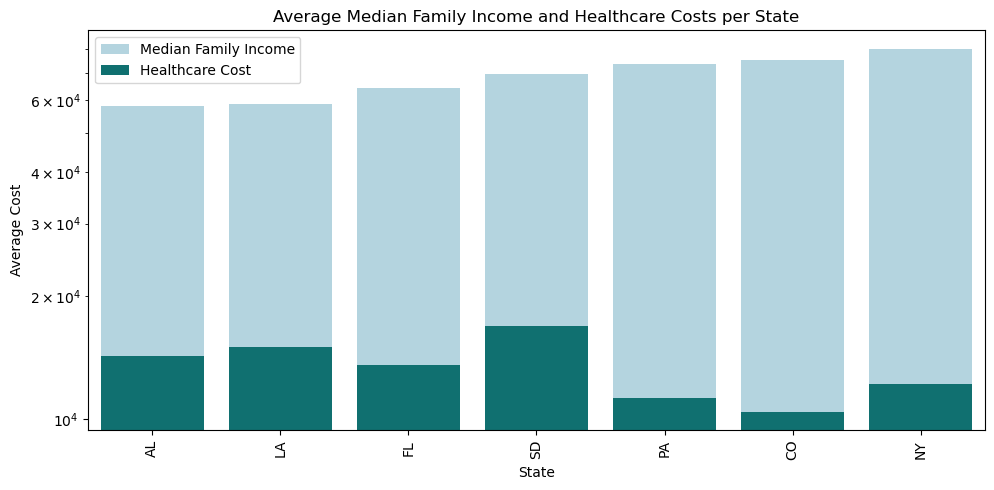

In [99]:
states_of_interest = ['FL', 'AL', 'PA', 'SD', 'LA', 'CO', 'NY']
filtered_df = us_cost_df[us_cost_df['state'].isin(states_of_interest)]
average_income = filtered_df.groupby('state')['median_family_income'].mean().sort_values().reset_index()
average_healthcare_cost = filtered_df.groupby('state')['healthcare_cost'].mean().reset_index()
average_data = pd.merge(average_income, average_healthcare_cost, on='state')
plt.figure(figsize=(10,5))
ax = sns.barplot(x='state', y='median_family_income', data=average_data, color='#ADD8E6', label='Median Family Income')
ax = sns.barplot(x='state', y='healthcare_cost', data=average_data, color='#008080', label='Healthcare Cost')
plt.xlabel('State')
plt.ylabel('Average Cost')
plt.title('Average Median Family Income and Healthcare Costs per State')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
ax.set_yscale("log")
plt.show()


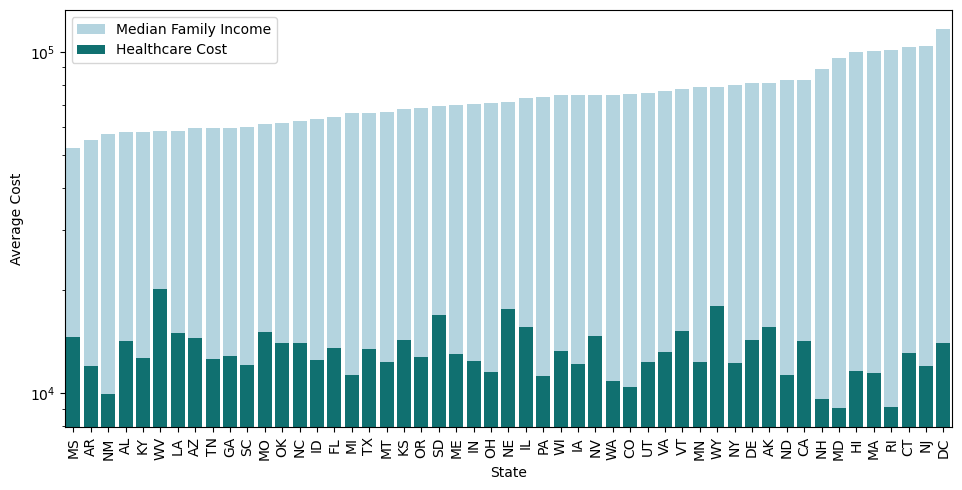

In [91]:
average_income = us_cost_df.groupby('state')['median_family_income'].mean().sort_values().reset_index()
average_healthcare_cost = us_cost_df.groupby('state')['healthcare_cost'].mean().reset_index()
average_data = pd.merge(average_income, average_healthcare_cost, on='state')
plt.figure(figsize=(10,5))
ax=sns.barplot(x='state', y='median_family_income', data=average_data, color='#ADD8E6', label='Median Family Income')
ax=sns.barplot(x='state', y='healthcare_cost', data=average_data, color='#008080', label='Healthcare Cost')
plt.xlabel('State')
plt.ylabel('Average Cost')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
ax.set_yscale("log")
plt.show()


It can be seen that the gap between countries with high incomes and countries with low incomes is not related to the field of health comprehensively for all US states.

# Conclusion 3


### Correlation


<Axes: >

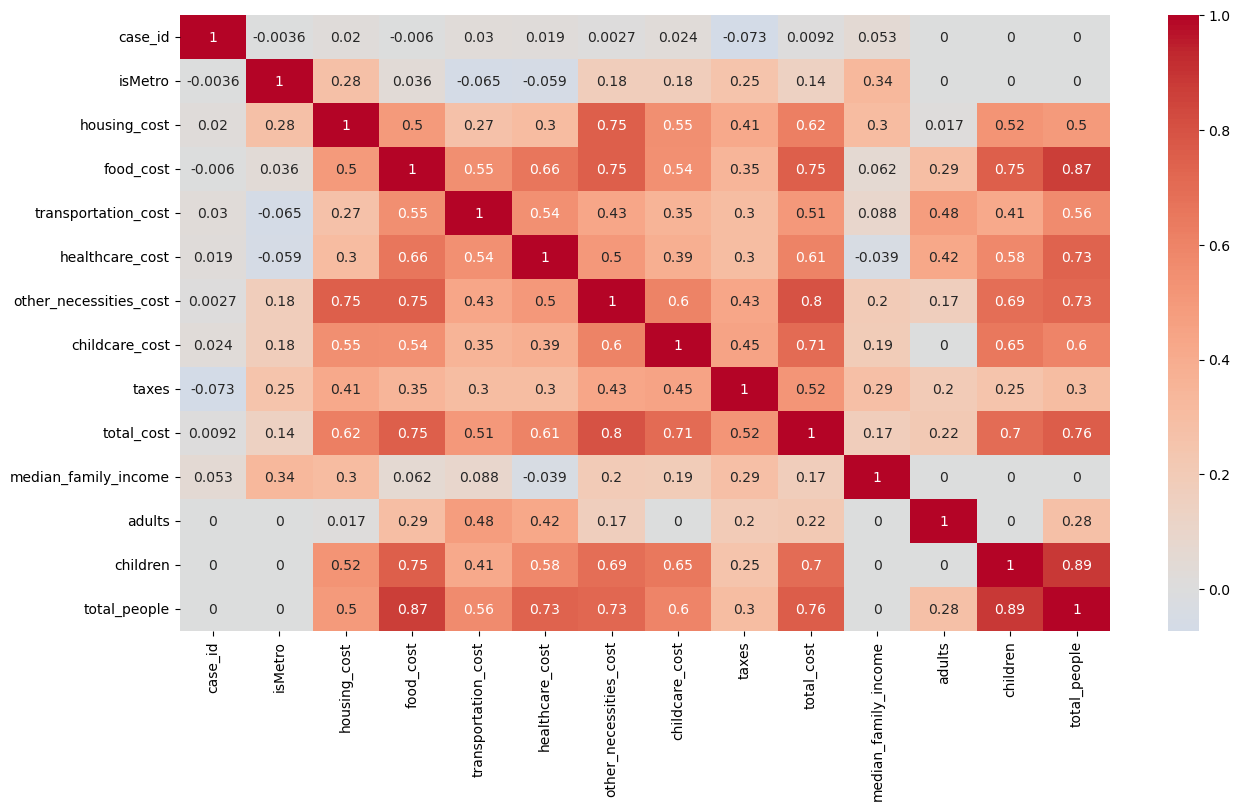

In [21]:
corrs =  us_cost_df.corr(method = 'kendall', numeric_only=True)
plt.figure(figsize=(15,8))
sns.heatmap(corrs, cmap='coolwarm', center=0, annot = True)

We identified a strong positive relationship between the food_cost and total_cost and between the housing_cost and total_cost

### Comparison table relating the number of people in the family to expenses

In [102]:
ny_data = us_cost_df[us_cost_df['state'] == 'NY'].copy() 
ny_data.loc[:, 'family_members'] = ny_data['adults'] + ny_data['children']
ny_data.loc[:, 'housing_cost'] = ny_data['food_cost']
ny_data.loc[:, 'food_cost_ratio'] = ny_data['food_cost'] / ny_data['total_cost']
top_ratios = ny_data.nlargest(10, 'food_cost_ratio')
result_table = top_ratios[['state','family_members', 'food_cost_ratio']]
result_table

,state,family_members,food_cost_ratio
18419,NY,6,0.164857
18309,NY,6,0.160410
18899,NY,6,0.157686
18414,NY,5,0.153692
18595,NY,2,0.150348
18304,NY,5,0.148263
18359,NY,6,0.145769
18894,NY,5,0.145132
18389,NY,6,0.143574
18599,NY,6,0.143518


In [101]:
ny_data = us_cost_df[us_cost_df['state'] == 'NY'].copy()
ny_data.loc[:, 'family_members'] = ny_data['adults'] + ny_data['children']
ny_data.loc[:, 'housing_cost'] = ny_data['housing_cost']
ny_data.loc[:, 'housing_cost_ratio'] = ny_data['housing_cost'] / ny_data['total_cost']
top_ratios = ny_data.nlargest(10, 'housing_cost_ratio')
result_table = top_ratios[['state', 'family_members', 'housing_cost_ratio']]
result_table

,state,family_members,housing_cost_ratio
18590,NY,1,0.386196
18690,NY,1,0.378488
18520,NY,1,0.374932
18310,NY,1,0.360455
18720,NY,1,0.343022
18710,NY,1,0.336013
18595,NY,2,0.323186
18680,NY,1,0.322134
18695,NY,2,0.320058
18880,NY,1,0.315809


You can see that the ratio between housing expenses and general expenses is the highest in the state of New York. We wanted to understand if this is because there are more lines for New York in our file and it didn't turn out that way. New York is not the largest state, nor does it have the highest number of districts, but nevertheless, we see overwhelmingly that in this country singles spend on housing (in relation to the total expenses, it is the highest.) We wanted to check whether this is a private case or whether it is a sweeping phenomenon.

We expected to see that as the family grew, the expenses for housing and food would increase accordingly.
In the table that shows the ratio of families in spending on food, the ratio we expected was indeed met.
On the other hand, the correlation between apartment expenses and family size is surprising. We were surprised to find out that singles or couples pay much more than families with children.

### Linear distribution of the families between all countries

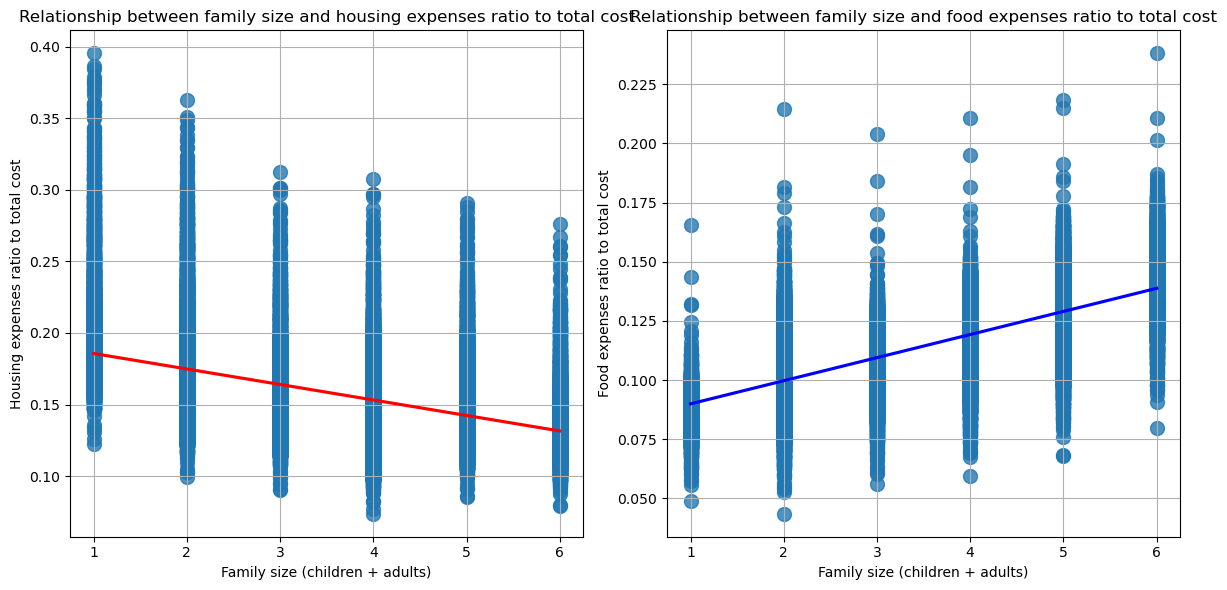

In [31]:
us_cost_df['Family'] = us_cost_df['children'] + us_cost_df['adults']
us_cost_df['housing_cost_ratio'] = us_cost_df['housing_cost'] / us_cost_df['total_cost']
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1) 
sns.regplot(x='Family', y='housing_cost_ratio', data=us_cost_df, scatter_kws={'s': 100}, line_kws={'color': 'red'})
plt.title('Relationship between family size and housing expenses ratio to total cost')
plt.xlabel('Family size (children + adults)')
plt.ylabel('Housing expenses ratio to total cost')
plt.grid(True)
us_cost_df['food_cost_ratio'] = us_cost_df['food_cost'] / us_cost_df['total_cost']
plt.subplot(1, 2, 2)
sns.regplot(x='Family', y='food_cost_ratio', data=us_cost_df, scatter_kws={'s': 100}, line_kws={'color': 'blue'})
plt.title('Relationship between family size and food expenses ratio to total cost')
plt.xlabel('Family size (children + adults)')
plt.ylabel('Food expenses ratio to total cost')
plt.grid(True)
plt.subplots_adjust(wspace=0.3, hspace=0.4)
plt.tight_layout()
plt.show()